# dev
- reimplementing the 'Quickstart' notebook from S. Rasp for training in pytorch

# loading data

In [1]:
import numpy as np
import xarray as xr
import torch
from src.train_nn_pytorch import Dataset

if torch.cuda.is_available():
    print('using CUDA !')
    device = torch.device("cuda")
    torch.set_default_tensor_type("torch.cuda.FloatTensor")
else:
    print("CUDA not available")
    device = torch.device("cpu")
    torch.set_default_tensor_type("torch.FloatTensor")

lead_time = 3*24
var_dict = {'z': None, 't': None}
batch_size = 32

datadir = '/gpfs/work/nonnenma/data/forecast_predictability/weatherbench/5_625deg/'
res_dir = '/gpfs/work/nonnenma/results/forecast_predictability/weatherbench/5_625deg/'

z500 = xr.open_mfdataset(f'{datadir}geopotential_500/*.nc', combine='by_coords')
t850 = xr.open_mfdataset(f'{datadir}temperature_850/*.nc', combine='by_coords')
dataset_list = [z500, t850]
x = xr.merge(dataset_list, compat='override')
n_channels = len(dataset_list) # = 1 if only loading one of geopotential Z500 and temperature T850

# tbd: separating train and test datasets / loaders should be avoidable with the start/end arguments of Dataset!

dg_train = Dataset(x.sel(time=slice('2010', '2015')), var_dict, lead_time, normalize=True)
train_loader = torch.utils.data.DataLoader(
    dg_train,
    batch_size=batch_size,
    drop_last=True)

dg_validation =  Dataset(x.sel(time=slice('2016', '2016')), var_dict, lead_time,
                        mean=dg_train.mean, std=dg_train.std, normalize=True)
validation_loader = torch.utils.data.DataLoader(
    dg_validation,
    batch_size=batch_size,
    drop_last=False)

CUDA not available


In [2]:
for batch in train_loader:
    inputs, targets = batch[0].to(device), batch[1].to(device)
    print((inputs.shape, targets.shape))

/gpfs/home/nonnenma/anaconda3/lib/python3.7/site-packages/xarray/core/indexing.py:1325: PerformanceWarning: Slicing with an out-of-order index is generating 7321 times more chunks
  return self.array[key]
/gpfs/home/nonnenma/anaconda3/lib/python3.7/site-packages/xarray/core/indexing.py:1325: PerformanceWarning: Slicing with an out-of-order index is generating 7322 times more chunks
  return self.array[key]


(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]

(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]

(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]

(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]

(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]

(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]

(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]

(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]))
(torch.Size([32, 2, 32, 64]), torch.Size([32, 2, 32, 64]

# define model

In [2]:
from src.train_nn_pytorch import SimpleCNN

net = SimpleCNN(filters=[64, 64, 64, 64, n_channels], kernels=[5, 5, 5, 5, 5], 
          channels=n_channels, activation=torch.nn.functional.elu, mode='standard')

# train model

In [3]:
import torch.optim as optim
import torch.nn.functional as F
from copy import deepcopy

train_again = False

if train_again:

    optimizer = optim.Adam(net.parameters(), lr=0.001)

    n_epochs, max_patience = 200, 20
    best_loss, patience = np.inf, max_patience
    best_state_dict = {}

    epoch = 0
    while True:

        epoch += 1
        if epoch > n_epochs:
            break

        print(f'epoch #{epoch}')
        # Train for a single epoch.
        for batch in train_loader:
            optimizer.zero_grad()
            inputs, targets = batch[0].to(device), batch[1].to(device)
            loss = F.mse_loss(net.forward(inputs), targets)
            loss.backward()
            optimizer.step()

        # Track convergence on validation set.
        val_loss = 0
        with torch.no_grad():
            nb = 0
            for batch in validation_loader:
                inputs, targets = batch[0].to(device), batch[1].to(device)
                val_loss += F.mse_loss(net.forward(inputs), targets)
                nb += 1
        val_loss /= nb
        print(f'epoch #{epoch} || loss (last batch) {loss} || validation loss {val_loss}')

        if val_loss < best_loss:
            patience = max_patience
            best_loss = val_loss
            best_state_dict = deepcopy(net.state_dict())
        else:
            patience -= 1

        if patience == 0:
            net.load_state_dict(best_state_dict)
            break

    torch.save(net.state_dict(), res_dir + 'test_fccnn_3d_pytorch.pt')

else:
    net.load_state_dict(torch.load(res_dir + 'test_fccnn_3d_pytorch.pt', map_location=torch.device(device)))


# debug

### Create a prediction and compute score

Now that we have a model (albeit a crappy one) we can create a prediction. For this we need to create a forecast for each forecast initialization time in the testing range (2017-2018) and unnormalize it. We then convert the forecasts to a Xarray dataset which allows us to easily compute the RMSE. All of this is taken care of in the `create_predictions()` function.

In [4]:
net

SimpleCNN(
  (layers): ModuleList(
    (0): Conv2d(2, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (2): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (3): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): Conv2d(64, 2, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  )
)

In [5]:
from src.train_nn_pytorch import create_predictions

dg_test =  Dataset(x.sel(time=slice('2017', '2018')), var_dict, lead_time,
                        mean=dg_train.mean, std=dg_train.std, normalize=True)
preds = create_predictions(net, dg_test)

In [6]:
from src.score import compute_weighted_rmse, load_test_data

z500_test = load_test_data(f'{datadir}geopotential_500/', 'z')
t850_test = load_test_data(f'{datadir}temperature_850/', 't')
rmse_z = compute_weighted_rmse(preds.z, z500_test.isel(time=slice(lead_time, None))).load()
rmse_t = compute_weighted_rmse(preds.t, t850_test.isel(time=slice(lead_time, None))).load()
rmse_z, rmse_t

(<xarray.DataArray 'z_rmse' ()>
 array(860.32754819)
 Coordinates:
     level    int32 500, <xarray.DataArray 't_rmse' ()>
 array(3.90900385)
 Coordinates:
     level    int32 850)

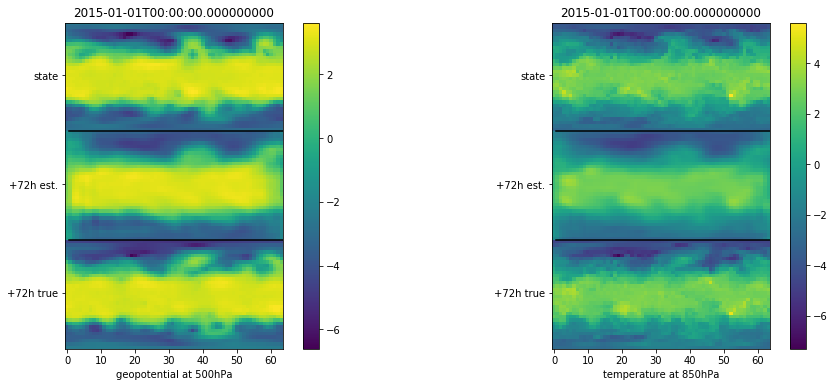

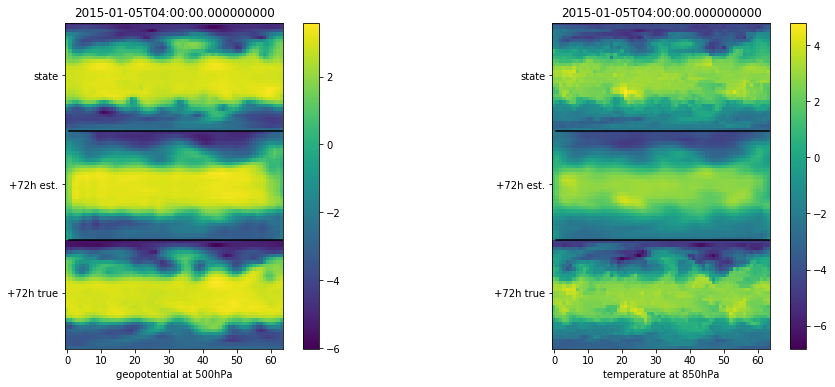

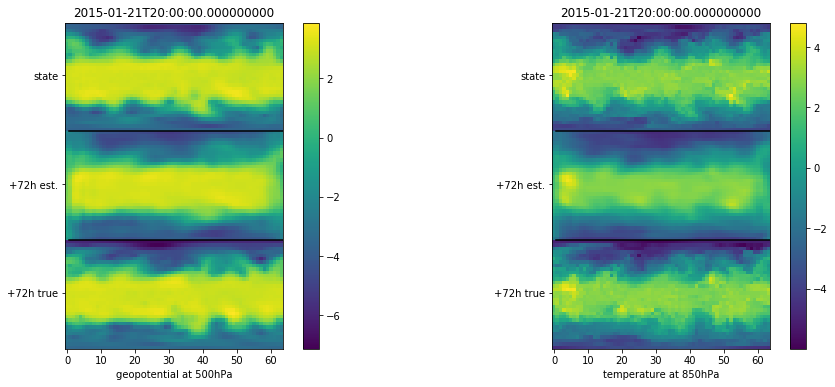

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

var_names = {'z' : 'geopotential at 500hPa',
             't' : 'temperature at 850hPa'}
idx = [0, 100, 500]
for i in idx:
    pred = net.forward(torch.tensor(dg_test[[i]][0],requires_grad=False).to(device)).detach().numpy()
    #pred = pred*dg_train.std.values[None,:,None,None] + dg_train.mean.values[None,:,None,None]
    plt.figure(figsize=(16,6))
    for j in range(2):
        plt.subplot(1,2,j+1)
        plt.imshow(np.vstack((dg_test[[i]][1][0,j,:,:], pred[0,j,:,:], dg_test[[i]][0][0,j,:,:])))
        plt.plot([0.5, pred.shape[3]+.5], (1*pred.shape[2]-0.5)*np.ones(2), 'k', linewidth=1.5)
        plt.plot([0.5, pred.shape[3]+.5], (2*pred.shape[2]-0.5)*np.ones(2), 'k', linewidth=1.5)
        plt.yticks([pred.shape[2]//2, 3*pred.shape[2]//2, 5*pred.shape[2]//2], 
                   [f'+{lead_time}h true', f'+{lead_time}h est.', 'state'])
        plt.axis([-0.5, pred.shape[3]-0.5, -0.5, 3*pred.shape[2]-0.5])
        plt.colorbar()
        plt.xlabel(var_names[list(dg_train.var_dict.keys())[j]])
        plt.title(dg_train.data.time.isel(time=i).values)
    plt.show()


# The End

This is the end of the quickstart guide. Please refer to the Jupyter notebooks in the `notebooks` directory for more examples. If you have questions, feel free to ask them as a Github Issue.